In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
#Import Each Directory as a Dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\nicjr\Desktop\Final_Project\Vegetable_Images\train',
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (224, 224)
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\nicjr\Desktop\Final_Project\Vegetable_Images\test',
    labels="inferred",
    label_mode="int",
    batch_size = 32,
    image_size = (224, 224)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\nicjr\Desktop\Final_Project\Vegetable_Images\validation',
    labels="inferred",
    label_mode="int",
    batch_size = 32,
    image_size = (224, 224)
)

external_ds = tf.keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\nicjr\Desktop\Final_Project\Vegetable_Images\externaltest',
    labels="inferred",
    label_mode="int",
    batch_size = 32,
    image_size = (224, 224)
)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 15 files belonging to 15 classes.


In [3]:
#Build CNN

model = models.Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224, 224, 3))),

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(15,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0

In [4]:
#Compile And Train

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    epochs=20,
    validation_data = validation_ds
)

Epoch 1/20
469/469 [==============================] - 31s 55ms/step - loss: 0.9514 - accuracy: 0.6913 - val_loss: 0.4142 - val_accuracy: 0.8700
Epoch 2/20
469/469 [==============================] - 25s 53ms/step - loss: 0.2729 - accuracy: 0.9121 - val_loss: 0.2518 - val_accuracy: 0.9227
Epoch 3/20
469/469 [==============================] - 25s 53ms/step - loss: 0.1450 - accuracy: 0.9552 - val_loss: 0.2069 - val_accuracy: 0.9417
Epoch 4/20
469/469 [==============================] - 25s 54ms/step - loss: 0.0925 - accuracy: 0.9713 - val_loss: 0.2226 - val_accuracy: 0.9373
Epoch 5/20
469/469 [==============================] - 25s 54ms/step - loss: 0.0664 - accuracy: 0.9781 - val_loss: 0.2316 - val_accuracy: 0.9500
Epoch 6/20
469/469 [==============================] - 25s 52ms/step - loss: 0.0574 - accuracy: 0.9837 - val_loss: 0.3067 - val_accuracy: 0.9267
Epoch 7/20
469/469 [==============================] - 24s 52ms/step - loss: 0.0515 - accuracy: 0.9845 - val_loss: 0.2048 - val_accuracy:

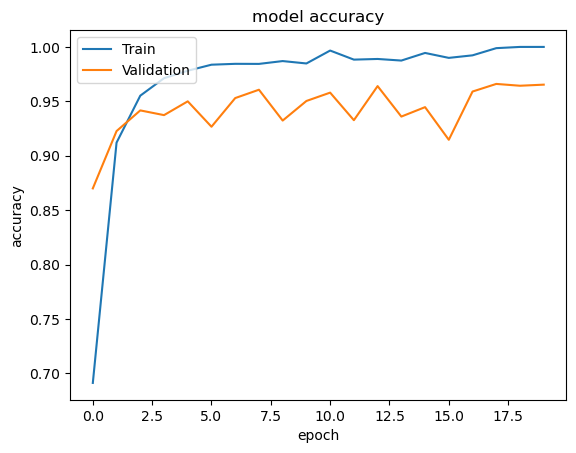

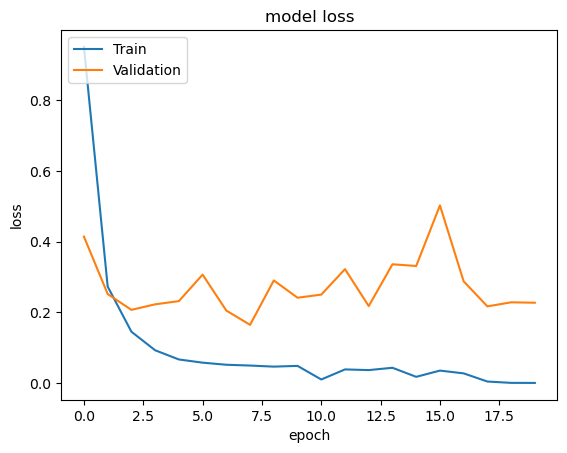

In [5]:
# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [6]:
#Test with given dataset
loss, accuracy = model.evaluate(test_ds)
print("Loss: ", loss)
print("accuracy", accuracy)

94/94 [==============================] - 2s 25ms/step - loss: 0.1801 - accuracy: 0.9683
Loss:  0.1801481544971466
accuracy 0.9683333039283752


In [7]:
#Test with external dataset
loss, accuracy = model.evaluate(external_ds)
print("Loss: ", loss)
print("accuracy", accuracy)

5/5 [==============================] - 0s 4ms/step - loss: 18.4832 - accuracy: 0.2667
Loss:  18.48317527770996
accuracy 0.2666666805744171
